In [161]:
import time
from datetime import timedelta
import matplotlib.pyplot as plt

#linear algebra
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go

In [162]:
df = pd.read_csv("bank-additional-full.csv")

In [163]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [165]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [166]:
#lấy ra 5 thuộc tính có số lượng giá trị rỗng nhiều nhất
total  = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending= False)
missing = pd.concat([total, percent_2], axis =1, keys = ['Total', '%'])
missing.head()

,Total,%
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0


không thấy có dữ liệu bị rỗng 

<AxesSubplot:title={'center':'Deposit value counts'}>

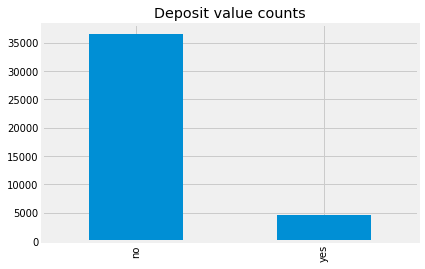

In [167]:
value_counts = df['y'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

In [168]:
temp = value_counts/df['y'].count()
temp

no     0.887346
yes    0.112654
Name: y, dtype: float64

-Thống kê cho thấy có 88.7% khách hàng không đăng kí và 11.3% khách hàng đăng kí tiền gửi 
kì hạn

In [169]:
df1= df.replace('unknown', np.nan)
df1.dropna(inplace=True)
df1.reset_index(drop= True, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [170]:
count_unknown = df.count()- df1.count()
count_unknown

age               10700
job               10700
marital           10700
education         10700
default           10700
housing           10700
loan              10700
contact           10700
month             10700
day_of_week       10700
duration          10700
campaign          10700
pdays             10700
previous          10700
poutcome          10700
emp.var.rate      10700
cons.price.idx    10700
cons.conf.idx     10700
euribor3m         10700
nr.employed       10700
y                 10700
dtype: int64

-xoá các thuộc tính unknown của bộ dữ liệu 

In [171]:
df1.drop('duration', axis = 1, inplace= True)
df1.drop("pdays", axis= 1, inplace = True)
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- loại các thuộc tính duration và pdays bởi vì:
    thuộc tính duration đa số các cuộc gọi đều bằng 0 tại vì không liên hệ được 
    thuộc tính pdays đa số các khách hàng không được liên hệ 

In [172]:
for dataset in [df1]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 32, 'age' ] = 0
    dataset.loc[(dataset['age'] > 32)  & (dataset['age'] <= 38 ), 'age' ] = 1
    dataset.loc[(dataset['age'] > 38)  & (dataset['age'] <= 47 ), 'age' ] = 2
    dataset.loc[dataset['age'] > 47 , 'age' ] = 3
    

In [173]:
df1['age'].value_counts()

0    9373
1    7918
2    6882
3    6315
Name: age, dtype: int64

-chuyển đổi dữ liệu về kiểu int và chia các khách hàng thành 4 nhóm tuổi khách hàng 

In [174]:
#gộp các dòng dữ liệu basic.9y basic.6y basic.4y thành basic
df1['education'] = np.where(df1['education'] == 'basic.9y', 'basic', df1['education'])
df1['education'] = np.where(df1['education'] == 'basic.6y', 'basic', df1['education'])
df1['education'] = np.where(df1['education'] == 'basic.4y', 'basic', df1['education'])


In [175]:
df1['education'].unique()

array(['basic', 'high.school', 'professional.course', 'university.degree',
       'illiterate'], dtype=object)

In [176]:

data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,cons.conf.idx,y
0,3,3,1,0,0,0,0,1,6,1,1,0,1,-36.4,0
1,1,7,1,1,0,1,0,1,6,1,1,0,1,-36.4,0
2,2,0,1,0,0,0,0,1,6,1,1,0,1,-36.4,0
3,3,7,1,1,0,0,1,1,6,1,1,0,1,-36.4,0
4,3,0,1,3,0,0,0,1,6,1,1,0,1,-36.4,0
5,0,9,2,3,0,1,0,1,6,1,1,0,1,-36.4,0
6,0,7,2,1,0,1,0,1,6,1,1,0,1,-36.4,0
7,0,7,2,1,0,1,0,1,6,1,1,0,1,-36.4,0
8,0,1,2,1,0,0,1,1,6,1,1,0,1,-36.4,0
9,3,3,0,0,0,1,0,1,6,1,1,0,1,-36.4,0


In [177]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [178]:
#Chuyển các thuộc tính object sang label encoder

data = df1.copy()
accuracies = {}
times = {}
le = LabelEncoder()
for col in data.columns[[i == object for i in data.dtypes]]:
    data.loc[:, col] = le.fit_transform(data[col])
    print(le.classes_)

data.head(10)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
['divorced' 'married' 'single']
['basic' 'high.school' 'illiterate' 'professional.course'
 'university.degree']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']
['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,1,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,0,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,7,1,1,0,0,1,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,0,1,3,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,0,9,2,3,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,0,7,2,1,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,0,7,2,1,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,0,1,2,1,0,0,1,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,3,3,0,0,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [179]:
df1['age'].value_counts()

0    9373
1    7918
2    6882
3    6315
Name: age, dtype: int64

0    9373
1    7918
2    6882
3    6315
Name: age, dtype: int64


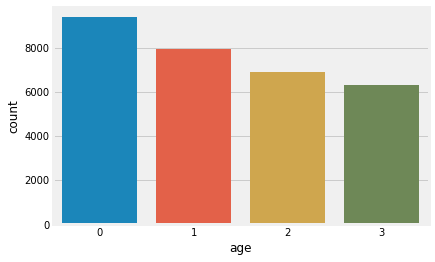

In [180]:
print(df1.age.value_counts())
ax= sns.countplot(data=df1, x='age')

-từ biểu đồ ta nhận xét được khách hàng từ độ tuổi dưới 32 thì nhiều nhất chiếm đến 9373
-và các số lượng khách hàng giảm dần theo độ tuổi

married     17492
single       9443
divorced     3553
Name: marital, dtype: int64
married     0.573734
single      0.309728
divorced    0.116538
Name: marital, dtype: float64


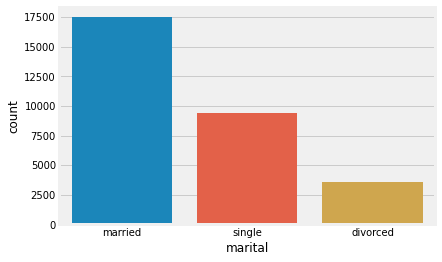

In [181]:
marital_value = df1.marital.value_counts()
marital_plot= sns.countplot(data=df1, x='marital')
print(marital_value)
print(marital_value/ df1.marital.count())

-từ biểu đồ ta nhận xét được khách hàng đa số là những người đã kết hôn chiếm đến 0.57% và độc thân chiếm 0.3% ...

<AxesSubplot:xlabel='marital', ylabel='y'>

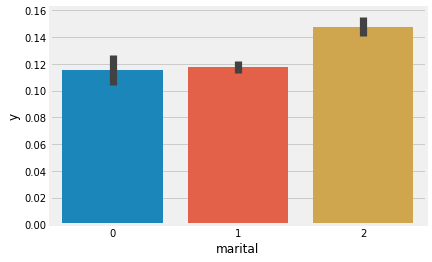

In [182]:
sns.barplot( x='marital',y='y', data=data )

yes    16521
no     13967
Name: housing, dtype: int64


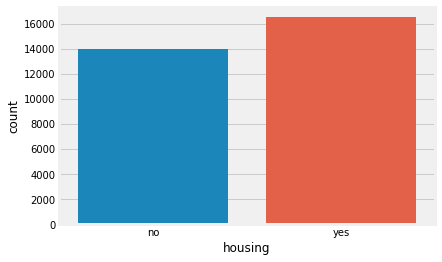

In [183]:
housing_value = df1.housing.value_counts()
print(housing_value)
housing_plot= sns.countplot(data=df1, x='housing')

<AxesSubplot:xlabel='education', ylabel='y'>

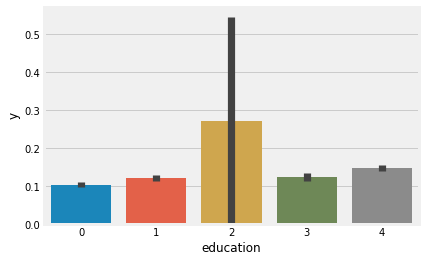

In [184]:
sns.barplot( x='education',y='y', data=data )

-nhìn vào đồ thị thấy được khách hàng có khoản vay nhà gần như bằng nhau 

0    25720
1     4768
Name: loan, dtype: int64


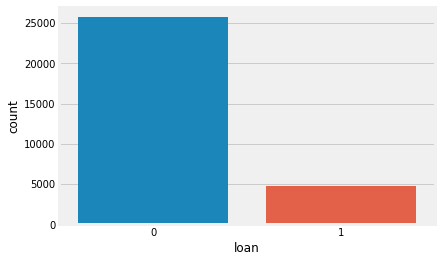

In [185]:
loan_value = data.loan.value_counts()
print(loan_value)
loan_plot= sns.countplot(data=data, x='loan')


<AxesSubplot:xlabel='loan', ylabel='y'>

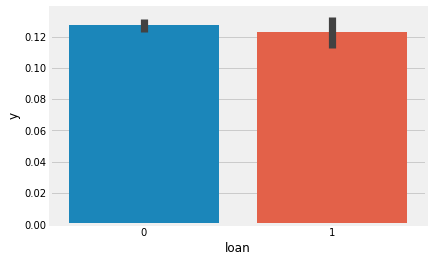

In [186]:
sns.barplot( x='loan',y='y', data=data )

-Thấy một yếu tố quan trọng nữa là khách hàng đa số có khoản nợ cá nhân

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64


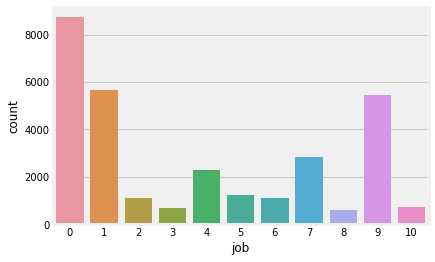

In [187]:
print(df1.job.value_counts())
ax= sns.countplot(data=data, x='job')

<AxesSubplot:xlabel='job', ylabel='y'>

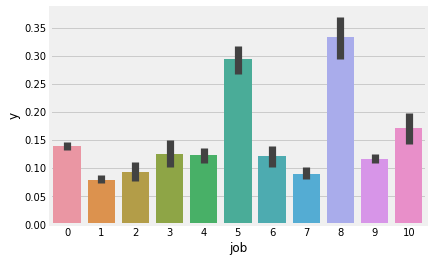

In [188]:
sns.barplot(x='job', y='y', data =data)

<AxesSubplot:>

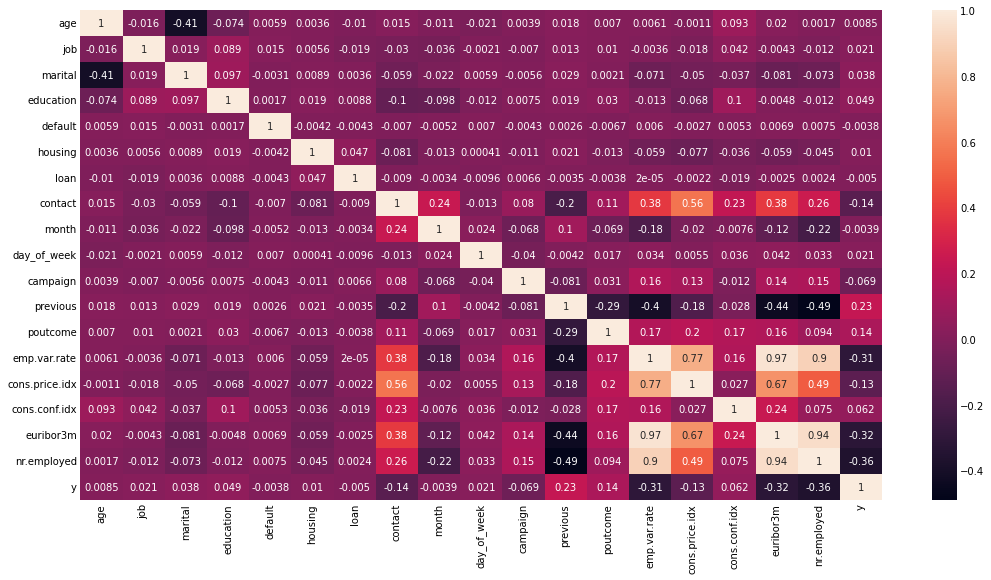

In [189]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [190]:
data.drop('emp.var.rate', axis = 1, inplace= True)
data.drop("cons.price.idx", axis= 1, inplace = True)
data.drop("euribor3m", axis= 1, inplace = True)
data.drop("nr.employed", axis= 1, inplace = True)

<AxesSubplot:>

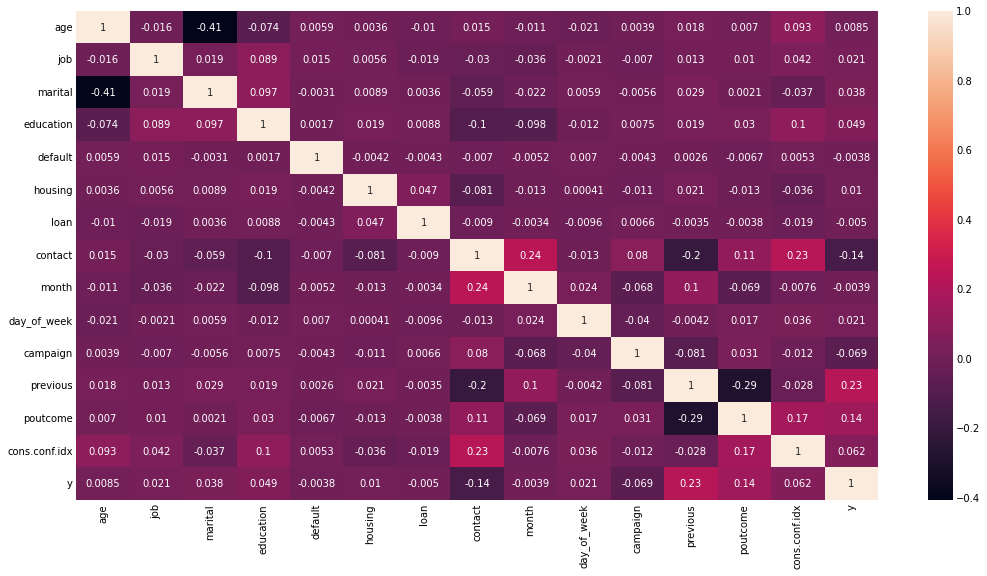

In [191]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

# -Thuật toán cây quyết định

In [192]:
x=data.drop('y', axis=1)
y=data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

-tachs dữ liệu thành 2 biến , 1 biến chứa thuộc tính bình thường, 1 biến chứa thuộc tính quyết định 
-chia tập dữ liệu thành 2 phần 70% huấn luyện , 30% kiểm thử

In [205]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tr= time.time()
clf.fit(x_train, y_train)
tree_pred = clf.predict(x_test)
end_tr = time.time()
times['id3'] = timedelta(seconds= round(end_tr -start_tr, 4)).total_seconds()
print("time: ", times['id3'])

time:  0.0859


In [206]:
tree_score = metrics.accuracy_score(y_test, tree_pred)
accuracies['id3'] = tree_score
print("accuracy: ", tree_score)
print("report",metrics.classification_report(y_test, tree_pred))

accuracy:  0.8325133923690827
report               precision    recall  f1-score   support

           0       0.90      0.91      0.90      7974
           1       0.34      0.33      0.34      1173

    accuracy                           0.83      9147
   macro avg       0.62      0.62      0.62      9147
weighted avg       0.83      0.83      0.83      9147



In [207]:
# tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

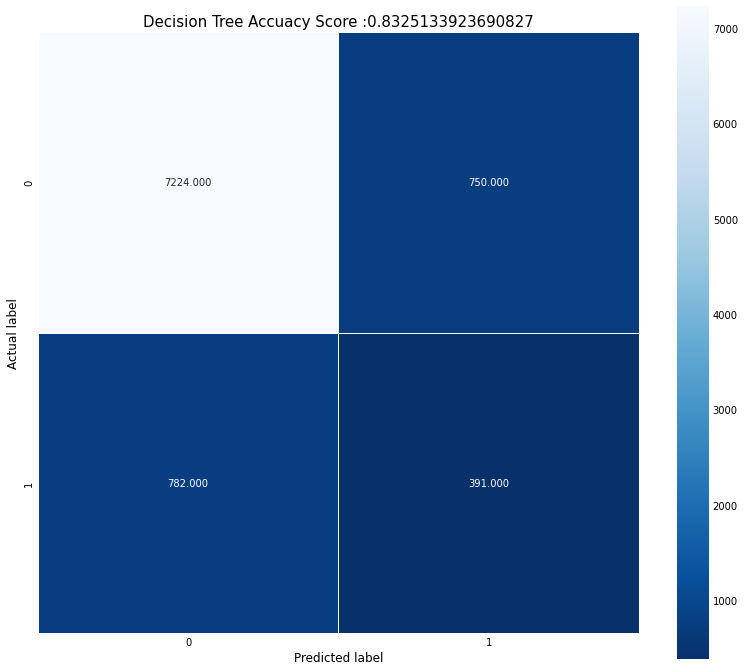

In [208]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot= True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuacy Score :{0}'.format(tree_score)
plt.title(title, size= 15);

độ chính xác : 0.9%
độ nhạy 0.9%
độ phủ : 34%
    

# -RAMDOM FOREST CLASSIFIER

	Random Forest sử dụng đồ thị có hướng để mô hình hóa việc ra quyết định; mỗi nút trên biểu đồ đại diện cho một câu hỏi về dữ liệu và các nhánh xuất phát từ mỗi nút đại diện cho các câu trả lời có thể có cho câu hỏi đó. Sau đó ở bước dự đoán, với một dữ liệu mới, ở mỗi cây quyết định sẽ đi từ trên xuống theo các node điều kiện để được các dự đoán, sau đó kết quả cuối cùng được tổng hợp từ kết quả của các cây quyết định.

-Xây dựng thuật toán Random Forest:
-Giả sử bộ dữ liệu có n dữ liệu (sample) và mỗi dữ liệu có d thuộc tính (feature).
-Các bước xây dựng mỗi cây quyết định:
-Lấy ngẫu nhiên n dữ liệu từ bộ dữ liệu với kĩ thuật Bootstrapping ( random sampling with replacement).
Khi sample được 1 dữ liệu thì không bỏ dữ liệu đấy ra mà vẫn giữ lại trong tập dữ liệu ban đầu,
rồi tiếp tục sample cho tới khi sample đủ n dữ liệu.
Khi dùng kĩ thuật này thì tập n dữ liệu mới có thể có những dữ liệu bị trùng nhau.
-Sau khi sample được n dữ liệu từ bước 1,
chọn ngẫu nhiên ở k thuộc tính (k < n)  Bộ dữ liệu mới gồm n dữ liệu và mỗi dữ liệu có k thuộc tính.
-Dùng thuật toán Decision Tree để xây dựng cây quyết định với bộ dữ liệu ở bước 2.
-Do quá trình xây dựng mỗi cây quyết định đều có yếu tố ngẫu nhiên (random) 
nên kết quả là các cây quyết định trong thuật toán Random Forest có thể khác nhau.
-Thuật toán Random Forest sẽ bao gồm nhiều cây quyết định, 
mỗi cây được xây dựng dùng thuật toán Decision Tree trên tập dữ liệu khác nhau và dùng tập thuộc tính khác nhau. 
Sau đó kết quả dự đoán của thuật toán Random Forest sẽ được tổng hợp từ các cây quyết định.


In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
rfc = RandomForestClassifier()

In [199]:
rf_pred = rfc.fit(x_train, y_train).predict(x_test)

In [200]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracies['RF'] = rf_score
print("Accuracy:" , rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))

Accuracy: 0.8721985350388105
Report               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7974
           1       0.50      0.27      0.35      1173

    accuracy                           0.87      9147
   macro avg       0.70      0.62      0.64      9147
weighted avg       0.85      0.87      0.86      9147



In [202]:
# tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, rf_pred)

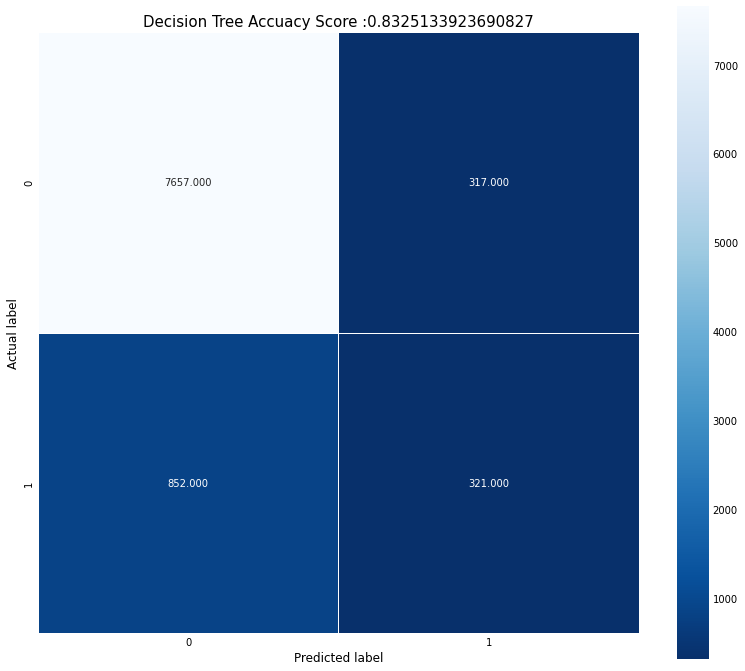

In [203]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot= True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuacy Score :{0}'.format(tree_score)
plt.title(title, size= 15);

Độ chính xác : 91%
Độ nhạy : 96%
Độ phủ:55%
-
Điểm F1 được định nghĩa là giá trị trung bình hài hòa giữa độ chính xác và độ thu hồi. Nó được sử dụng như một thước đo thống kê để đánh giá hiệu suất. Nói cách khác, điểm F1 (từ 0 đến 9, 0 là thấp nhất và 9 là cao nhất) là giá trị trung bình của hiệu suất của một cá nhân, dựa trên hai yếu tố, tức là độ chính xác và khả năng thu hồi.

- 
Điểm F1 có nghĩa là một thước đo thống kê về độ chính xác của một bài kiểm tra hoặc một cá nhân. Nó bao gồm hai thuộc tính chính, viz. độ chính xác và độ nhớ, cả hai được tính bằng phần trăm và được kết hợp dưới dạng sóng hài có nghĩa là chỉ định một số duy nhất, dễ hiểu.

support là số lượng mẫu phản hồi 
The support is the number of samples of the true response that lie in that class.

In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled= True, fontsize = 10)
plt.show()